# JDH statistics

## Articles published

By using the JDH api track: https://journalofdigitalhistory.org/api/articles/

In [11]:
import requests

# API URL
api_url = "https://journalofdigitalhistory.org/api/articles"

# Make the API call
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the list of articles from the response
    results = response_data.get("results", [])

    if results:
        # Display details of the first article
        first_article = results[0]

        # Check if "abstract" and other attributes are present in the response
        if 'abstract' in first_article and 'title' in first_article['abstract']:
            title = first_article['abstract']['title']
            status = first_article['abstract'].get('status', 'N/A')
            publication_date = first_article.get('publication_date', 'N/A')

            print("Article Details:")
            print(f"Title: {title}")
            print(f"Status: {status}")
            print(f"Publication Date: {publication_date}")
        else:
            print("Incomplete or unexpected article structure in the response.")
    else:
        print("No articles found in the response.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Article Details:
Title: Publishing digital history scholarship in the era of updatism
Status: PUBLISHED
Publication Date: 2023-08-17T09:48:21.271482+02:00


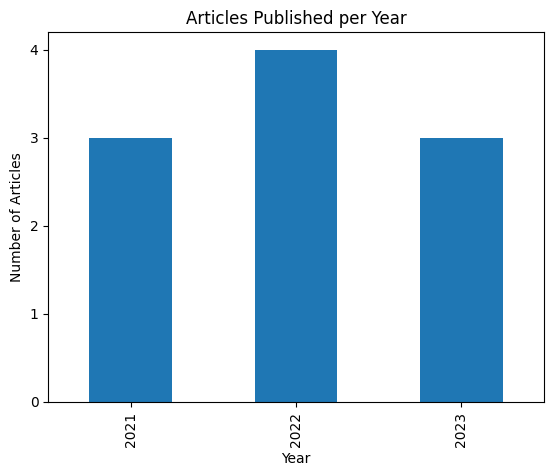

In [14]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API URL
api_url = "https://journalofdigitalhistory.org/api/articles/?format=json&limit=100"

# Make the API call
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the list of articles from the response
    results = response_data.get("results", [])

    if results:
        # Create a DataFrame with selected columns
        df = pd.DataFrame(results, columns=['status', 'publication_date', 'repository_type','tags'])

        # Extract the year using regular expressions
        df['publication_year'] = df['publication_date'].str.extract(r'(\d{4})', expand=False)
        
        # Check if 'tags' column exists before applying the filter
        if 'tags' in df.columns:
            # Filter out editorial articles
            df = df[~df['tags'].apply(lambda x: any(tag['name'] == 'editorial' for tag in x))]

        # Count the number of articles per year
        articles_per_year = df['publication_year'].value_counts().sort_index()

        # Plot the data
        articles_per_year.plot(kind='bar', xlabel='Year', ylabel='Number of Articles', title='Articles Published per Year')
        # Set y-axis ticks to integers only
        plt.yticks(range(int(articles_per_year.max()) + 1))

        plt.show()

    else:
        print("No articles found in the response.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


## Abstract submitted

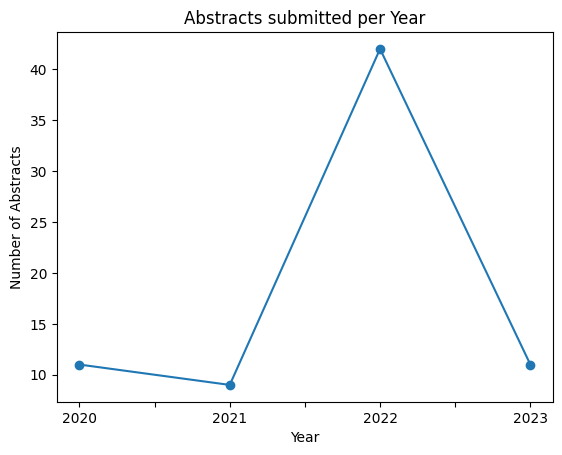

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API URL
api_url = "https://journalofdigitalhistory.org/api/abstracts/?format=json&limit=100"


username = "elisabeth.guerard"
password = PASSWORD

# Set up authentication
auth = (username, password)

# Make the API call with authentication
response = requests.get(api_url, auth=auth)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the list of articles from the response
    results = response_data.get("results", [])

    if results:
        # Create a DataFrame with selected columns
        df = pd.DataFrame(results, columns=['status', 'callpaper', 'submitted_date'])

        # Extract the year using regular expressions
        df['submitted_date'] = df['submitted_date'].str.extract(r'(\d{4})', expand=False)
        
 
        # Count the number of abstracts per year
        abstracts_per_year = df['submitted_date'].value_counts().sort_index()

     # Plot the data as a line plot
        abstracts_per_year.plot(kind='line', marker='o', xlabel='Year', ylabel='Number of Abstracts', title='Abstracts submitted per Year')

        plt.show()

    else:
        print("No abstracts found in the response.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


<Axes: title={'center': 'Abstracts submitted per Year'}, xlabel='Year', ylabel='Number of Abstracts'>

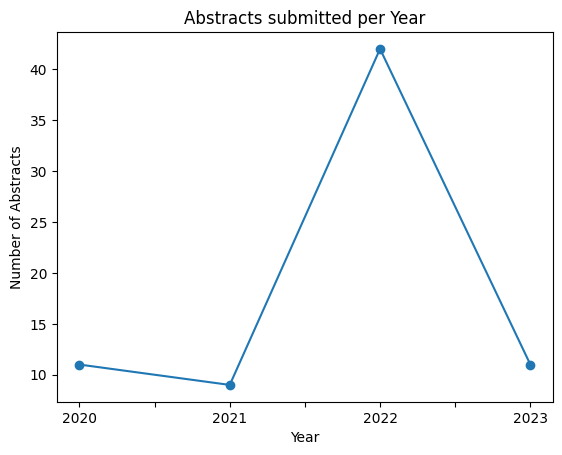

In [23]:
# Count the number of abstracts per year
abstracts_per_year = df['submitted_date'].value_counts().sort_index()

# Plot the data as a line plot
abstracts_per_year.plot(kind='line', marker='o', xlabel='Year', ylabel='Number of Abstracts', title='Abstracts submitted per Year')


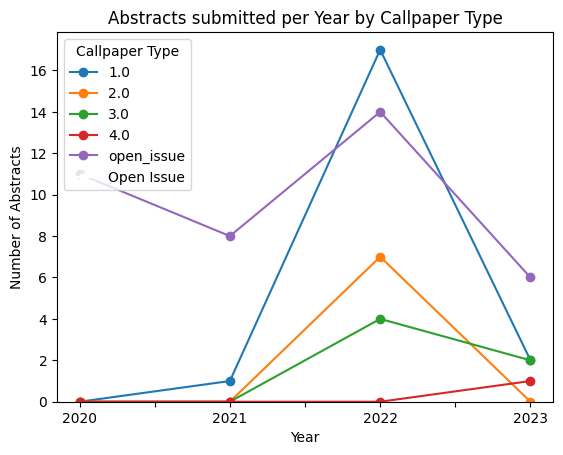

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API URL
api_url = "https://journalofdigitalhistory.org/api/abstracts/?format=json&limit=100"


# Set up authentication
auth = (username, password)

# Make the API call with authentication
response = requests.get(api_url, auth=auth)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the list of articles from the response
    results = response_data.get("results", [])

    if results:
        # Create a DataFrame with selected columns
        df = pd.DataFrame(results, columns=['status', 'callpaper', 'submitted_date'])

        # Extract the year using regular expressions
        df['submitted_date'] = df['submitted_date'].str.extract(r'(\d{4})', expand=False)

        # Handle the case where callpaper is null by replacing it with "open_issue"
        df['callpaper'].fillna('open_issue', inplace=True)

        # Create a pivot table to get the counts of abstracts for each callpaper type and year
        pivot_table = pd.pivot_table(df, values='status', index='submitted_date', columns='callpaper', aggfunc='count', fill_value=0)

        # Plot the data as a line plot
        ax = pivot_table.plot(kind='line', marker='o', xlabel='Year', ylabel='Number of Abstracts', title='Abstracts submitted per Year by Callpaper Type')

        # Get the handles and labels of the current axes
        handles, labels = ax.get_legend_handles_labels()

        # Include "open_issue" in the legend
        open_issue_label = "Open Issue"  # You can customize this label
        handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='w', markersize=5))  # Add a dummy point for open_issue
        labels.append(open_issue_label)

        # Plot the legend
        ax.legend(handles, labels, title='Callpaper Type', loc='upper left')
         # Set the y-axis origin to 0
        ax.set_ylim(bottom=0)
        plt.show()

    else:
        print("No abstracts found in the response.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


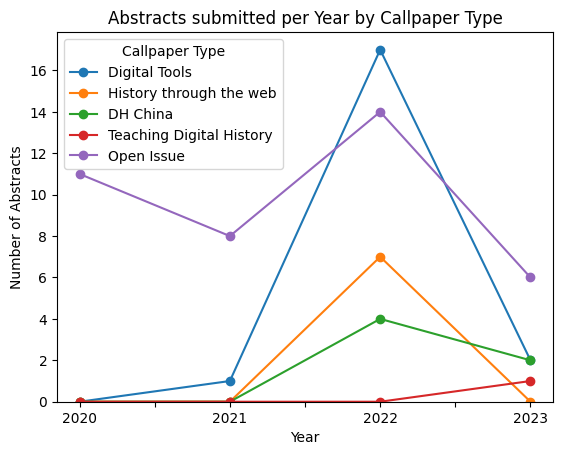

In [4]:
pivot_table = pd.pivot_table(df, values='status', index='submitted_date', columns='callpaper', aggfunc='count', fill_value=0)

# Plot the data as a line plot
ax = pivot_table.plot(kind='line', marker='o', xlabel='Year', ylabel='Number of Abstracts', title='Abstracts submitted per Year by Callpaper Type')

# Get the handles and labels of the current axes
handles, labels = ax.get_legend_handles_labels()
# Map callpaper values to corresponding labels
callpaper_labels = {
            '4.0': 'Teaching Digital History',
            '3.0': 'DH China',
            '2.0': 'History through the web',
            '1.0': 'Digital Tools',
            'open_issue': 'Open Issue'  # You can customize this label
        }
# Update legend labels
labels = [callpaper_labels[label] for label in labels]

# Plot the legend
ax.legend(handles, labels, title='Callpaper Type', loc='upper left')

# Set the y-axis origin to 0
ax.set_ylim(bottom=0)

plt.show()

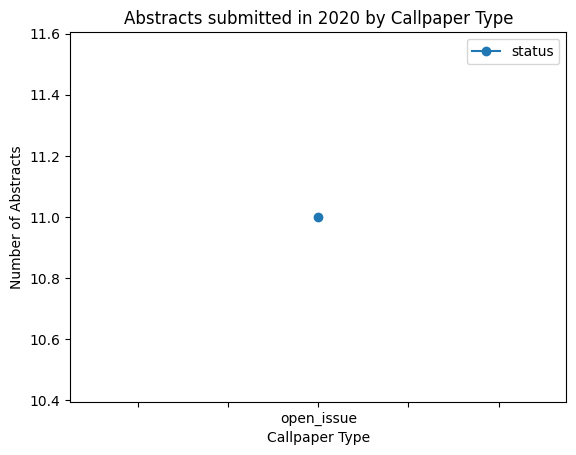

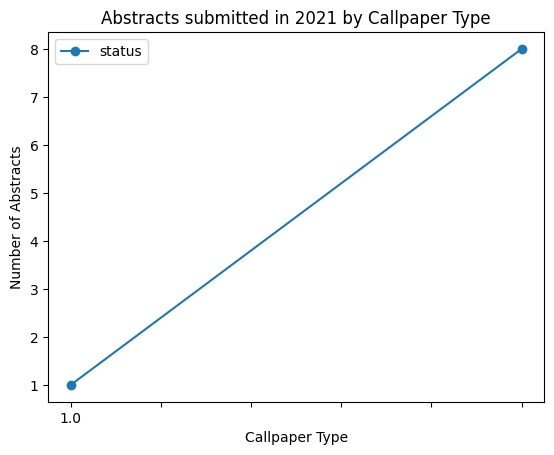

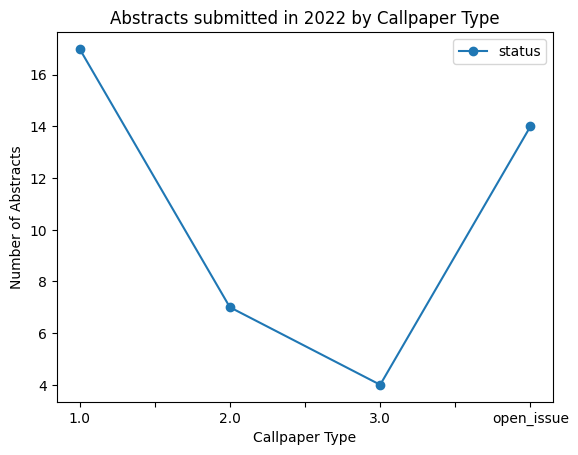

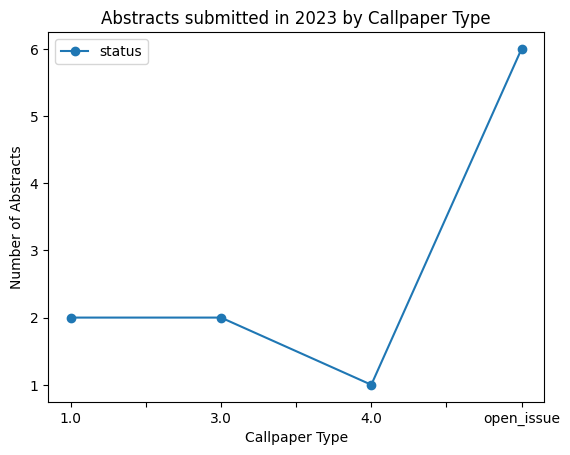

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API URL
api_url = "http://10.240.4.191/api/abstracts/?format=json&limit=100"

# Set up authentication
auth = (username, password)

# Make the API call with authentication
response = requests.get(api_url, auth=auth)



# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the list of articles from the response
    results = response_data.get("results", [])

    if results:
        # Create a DataFrame with selected columns
        df = pd.DataFrame(results, columns=['status', 'callpaper', 'submitted_date'])

        # Extract the year using regular expressions
        df['submitted_date'] = df['submitted_date'].str.extract(r'(\d{4})', expand=False)

        # Handle the case where callpaper is null by replacing it with "open_issue"
        df['callpaper'].fillna('open_issue', inplace=True)

        # Convert submitted_date to numeric (to handle nulls)
        df['submitted_date'] = pd.to_numeric(df['submitted_date'], errors='coerce')

        # Determine the minimum start year for each callpaper type
        min_start_years = df.groupby('callpaper')['submitted_date'].min()

        # Filter out abstracts submitted before the minimum start year for each callpaper type
        df = df[df['submitted_date'] >= df['callpaper'].map(min_start_years)]

        # Create a line plot for each year
        unique_years = df['submitted_date'].unique()
        for year in unique_years:
            # Filter the data for the current year
            df_year = df[df['submitted_date'] == year]

            # Create a pivot table for the current year
            pivot_table = pd.pivot_table(df_year, values='status', index='callpaper', aggfunc='count', fill_value=0)

            # Plot the data as a line plot
            pivot_table.plot(kind='line', marker='o', legend=True, title=f'Abstracts submitted in {year} by Callpaper Type')
            
            plt.xlabel('Callpaper Type')
            plt.ylabel('Number of Abstracts')
            plt.show()

    else:
        print("No abstracts found in the response.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


## Technical review

Need to track the Github issue of the repository https://github.com/C2DH/jdh-notebook

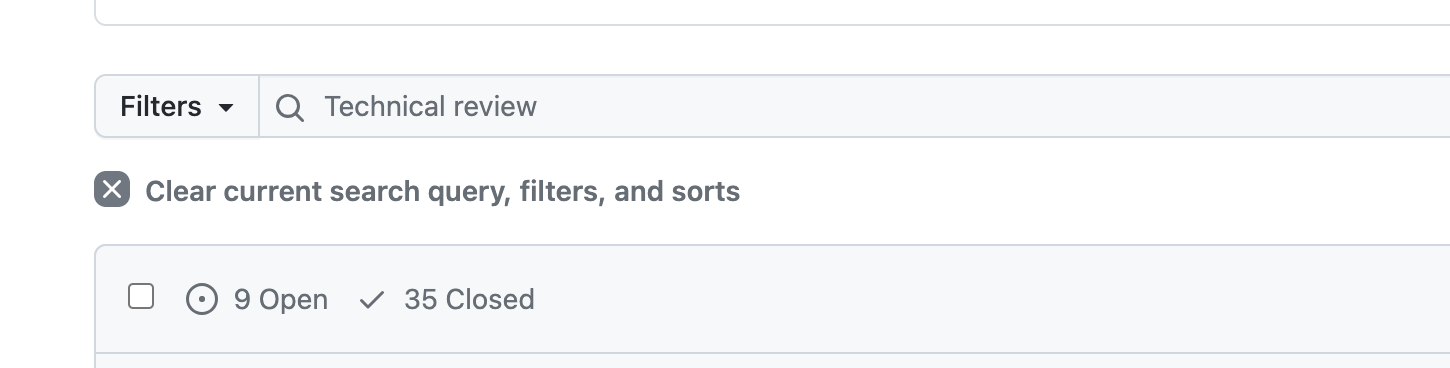

In [36]:
from IPython.display import Image 
display(Image("stats/technical_review_stats.png"))

On the 35 closed:

- 27 closed in 2023
- 6 closed in 2022
- 2 closed in 2021

Average 2 per month


Let's retrive this information by API.

In [37]:
ACCESS_TOKEN = ""

In [50]:
import requests
import json
import matplotlib.pyplot as plt



headers = {
    'Authorization': ACCESS_TOKEN ,
}

params = {

    'state': 'closed',  # or 'closed' for closed issues
}


repository_url = 'https://api.github.com/repos/C2DH/jdh-notebook/issues'

response = requests.get(repository_url, params=params, headers=headers)
issues = response.json()
# Filter issues with the title containing 'Technical review'
filtered_issues = [issue for issue in issues if 'Technical review' in issue.get('title', '')]

# Extract relevant information and create a DataFrame
data = [{'title': issue['title'], 'status': issue['state']} for issue in filtered_issues]
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,title,status
0,Technical review R1: Secret Societies and Revo...,closed
1,Technical review: Gaming the Qing Mandarinate:...,closed
2,Technical review: Machine-aided Detection of t...,closed
3,Technical review: Chinese Political and Cultur...,closed
4,Technical review: ReOrienting Digital History:...,closed
